In [1]:
## File Paths and Imports
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

# Set working directory
folder_path = r"C:\Users\Aisha\UWBclas\UWB25Spr\cs290RenEner\CaliSupplyVsEmissions"

In [2]:
# Find all quarterly generation files matching the pattern
quarterly_files = glob.glob(os.path.join(folder_path, "caiso_gen_all_5min_*.csv"))

all_quarterly_data = []

for file in quarterly_files:
    # Read CSV skipping the first 3 rows so the 4th row becomes header
    df = pd.read_csv(file, skiprows=3)
    
    # Extract Year_Quarter from filename (e.g. 'caiso_gen_all_5min_2020Q3.csv' -> '2020Q3')
    fname = os.path.basename(file)
    year_quarter = fname.split('_')[-1].replace('.csv', '')
    
    # Add a column to track the quarter
    df['Year_Quarter'] = year_quarter
    
    all_quarterly_data.append(df)

# Combine all quarterly data into one DataFrame
combined_df = pd.concat(all_quarterly_data, ignore_index=True)


In [3]:
# Define generation columns
generation_columns = [
    'Total Generation (MW)',
    'Batteries Generation (MW)',
    'Biogas Generation (MW)',
    'Biomass Generation (MW)',
    'Coal Generation (MW)',
    'Geothermal Generation (MW)',
    'Imports Generation (MW)',
    'Large Hydro Generation (MW)',
    'Natural Gas Generation (MW)',
    'Nuclear Generation (MW)',
    'Other Generation (MW)',
    'Small Hydro Generation (MW)',
    'Solar Generation (MW)',
    'Wind Generation (MW)'
]

# Group by Year_Quarter and sum all generation columns
quarterly_generation_totals = combined_df.groupby('Year_Quarter')[generation_columns].sum()

# Print available quarters and the generation totals
print("Available Quarters:", quarterly_generation_totals.index.tolist())
print("\nQuarterly Generation Totals:")
print(quarterly_generation_totals.head())


Available Quarters: ['2020Q3', '2020Q4', '2021Q1', '2021Q2', '2021Q3', '2021Q4', '2022Q1', '2022Q2', '2022Q3', '2022Q4', '2023Q1', '2023Q2', '2023Q3', '2023Q4', '2024Q1', '2024Q2', '2024Q3', '2024Q4', '2025Q1', '2025Q2']

Quarterly Generation Totals:
              Total Generation (MW)  Batteries Generation (MW)  \
Year_Quarter                                                     
2020Q3                   26861668.0                    -5238.0   
2020Q4                  644450872.0                   -54091.0   
2021Q1                  591264879.0                  -270536.0   
2021Q2                  652465925.0                  -367354.0   
2021Q3                  792697500.0                  -740162.0   

              Biogas Generation (MW)  Biomass Generation (MW)  \
Year_Quarter                                                    
2020Q3                      171984.0                 285988.0   
2020Q4                     5259344.0                6943958.0   
2021Q1                    

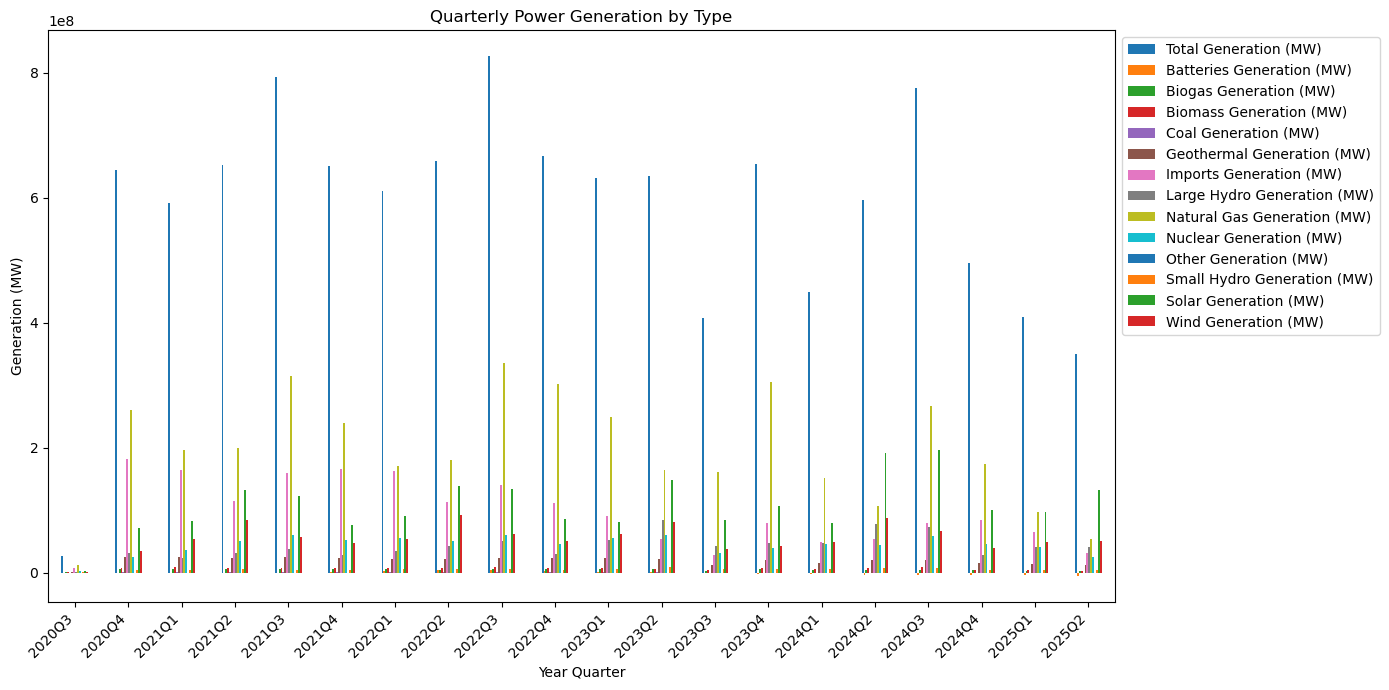

In [4]:
# Plot setup
fig, ax = plt.subplots(figsize=(14, 7))

# Bar chart: each Year_Quarter on x-axis, each bar is a generation type
quarterly_generation_totals.plot(kind='bar', ax=ax, stacked=False)

# Formatting
plt.xticks(rotation=45, ha='right')
plt.xlabel('Year Quarter')
plt.ylabel('Generation (MW)')
plt.title('Quarterly Power Generation by Type')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


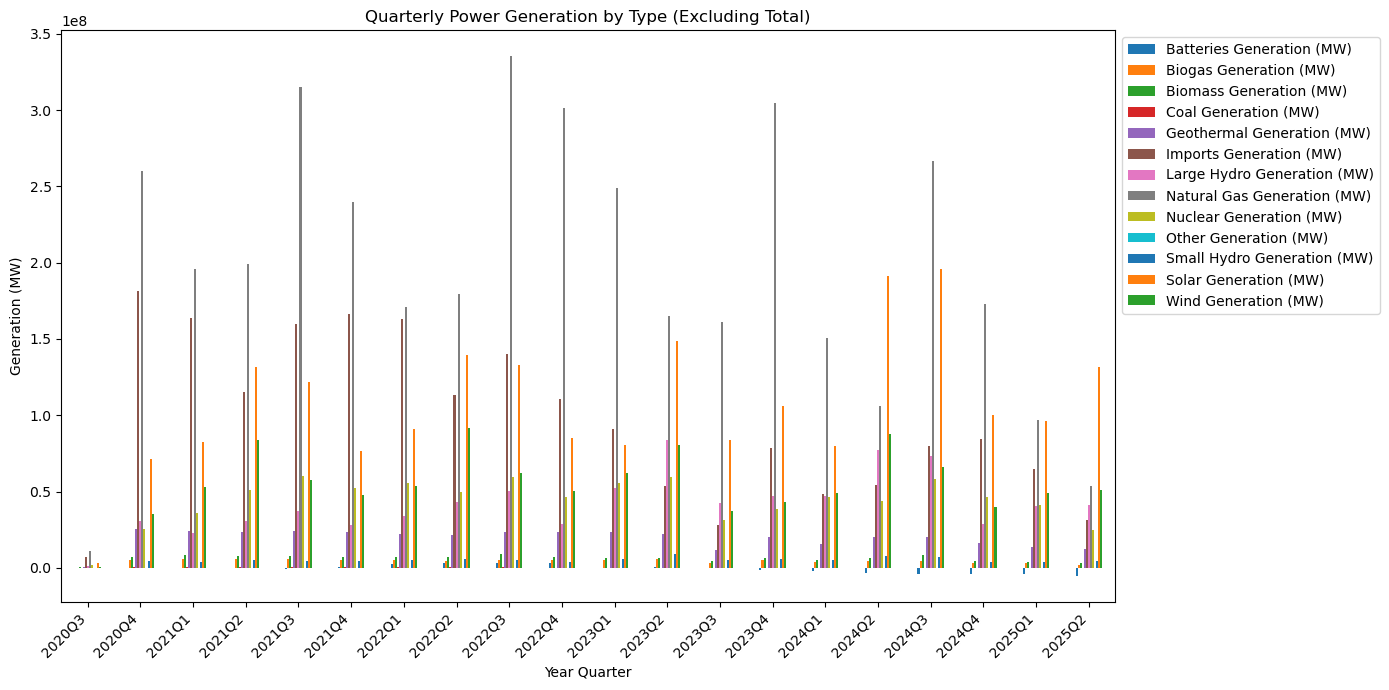

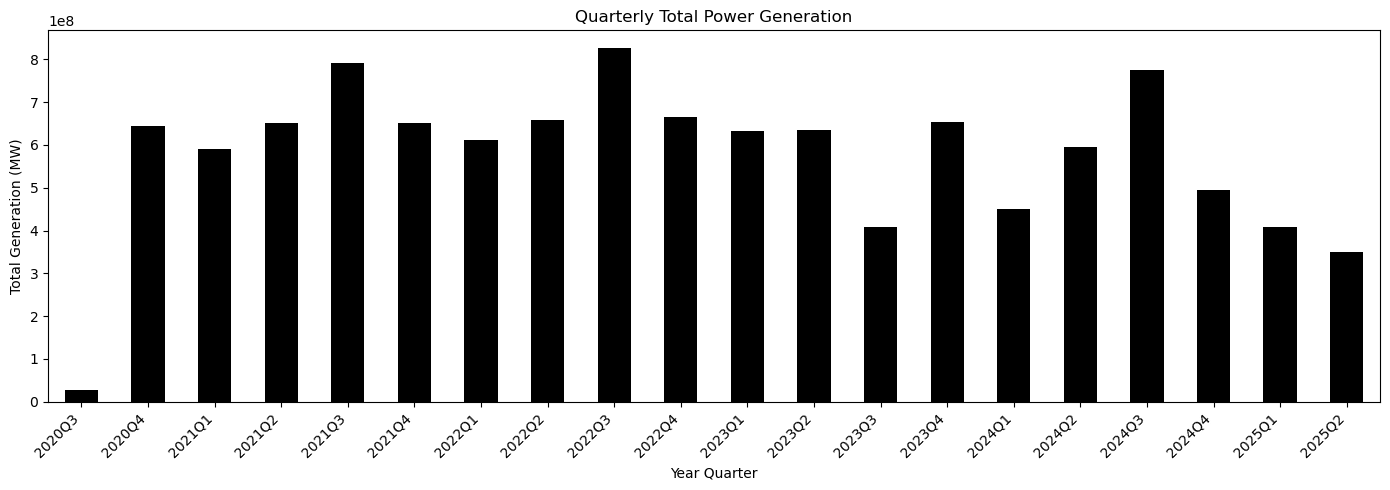

In [5]:
# --- Plot WITHOUT 'Total Generation (MW)' ---
fig, ax1 = plt.subplots(figsize=(14, 7))
quarterly_generation_totals.drop(columns=['Total Generation (MW)']).plot(
    kind='bar', ax=ax1, stacked=False
)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Year Quarter')
plt.ylabel('Generation (MW)')
plt.title('Quarterly Power Generation by Type (Excluding Total)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# --- Plot ONLY 'Total Generation (MW)' ---
fig, ax2 = plt.subplots(figsize=(14, 5))
quarterly_generation_totals[['Total Generation (MW)']].plot(
    kind='bar', ax=ax2, color='black', legend=False
)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Year Quarter')
plt.ylabel('Total Generation (MW)')
plt.title('Quarterly Total Power Generation')
plt.tight_layout()
plt.show()


2020Q3: 864 rows
2020Q4: 26484 rows
2021Q1: 25908 rows
2021Q2: 26200 rows
2021Q3: 26477 rows
2021Q4: 26480 rows
2022Q1: 25879 rows
2022Q2: 25846 rows
2022Q3: 26292 rows
2022Q4: 26496 rows
2023Q1: 25739 rows
2023Q2: 26203 rows
2023Q3: 14088 rows
2023Q4: 26459 rows
2024Q1: 20496 rows
2024Q2: 26182 rows
2024Q3: 26472 rows
2024Q4: 20640 rows
2025Q1: 18657 rows
2025Q2: 16056 rows


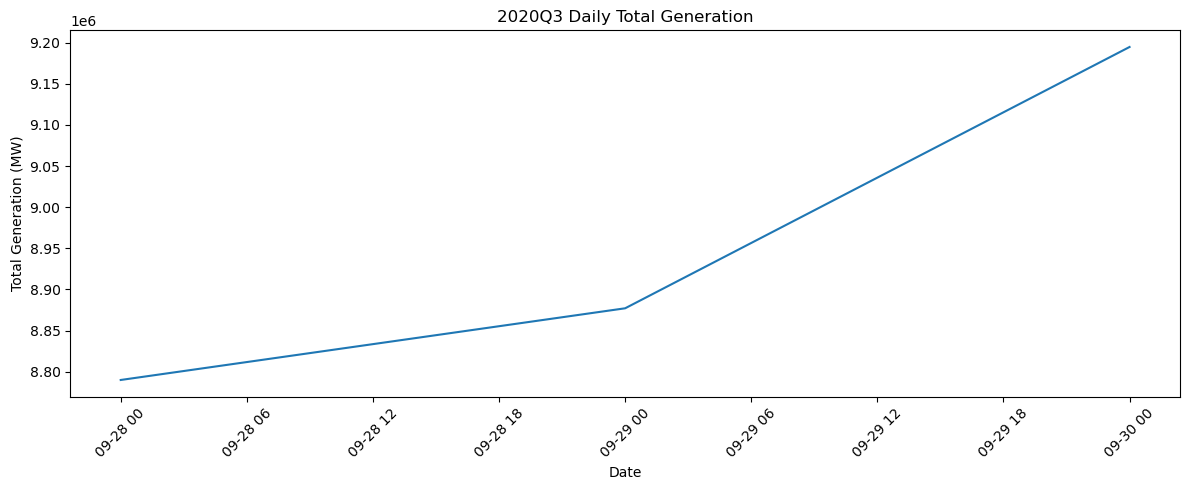

In [6]:
for file in quarterly_files:
    df = pd.read_csv(file, skiprows=3)
    year_quarter = os.path.basename(file).split('_')[-1].replace('.csv', '')
    print(f"{year_quarter}: {len(df)} rows")

# Filter only 2020Q3
q3_df = combined_df[combined_df['Year_Quarter'] == '2020Q3'].copy()

# Convert 'Local Date' to datetime
q3_df['Local Date'] = pd.to_datetime(q3_df['Local Date'], errors='coerce')

# Group by day and sum total generation
daily_q3 = q3_df.groupby(q3_df['Local Date'].dt.date)['Total Generation (MW)'].sum()

# Plot
plt.figure(figsize=(12,5))
daily_q3.plot()
plt.title("2020Q3 Daily Total Generation")
plt.ylabel("Total Generation (MW)")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


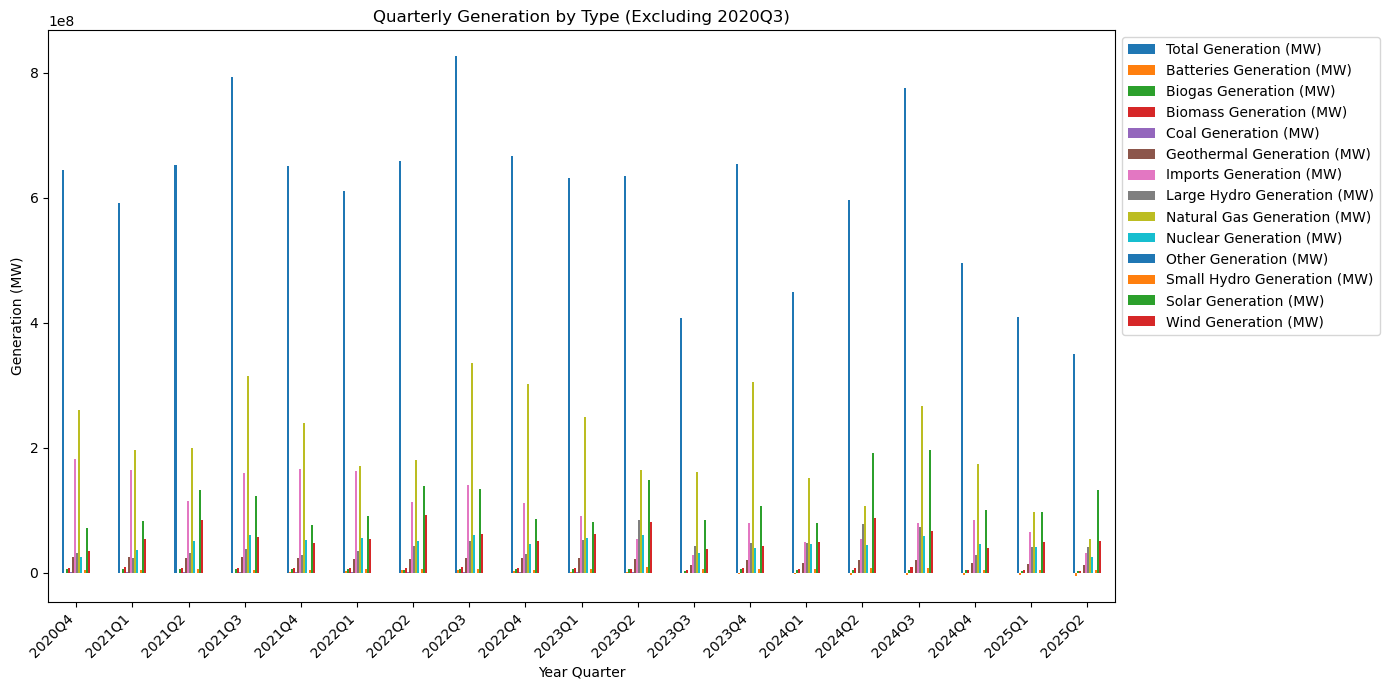

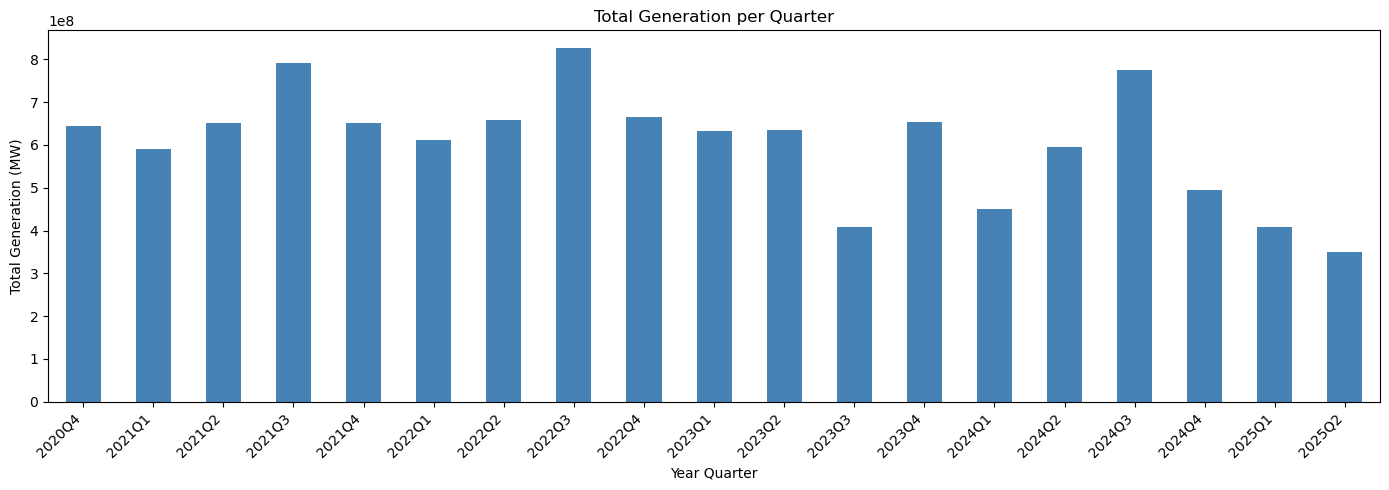

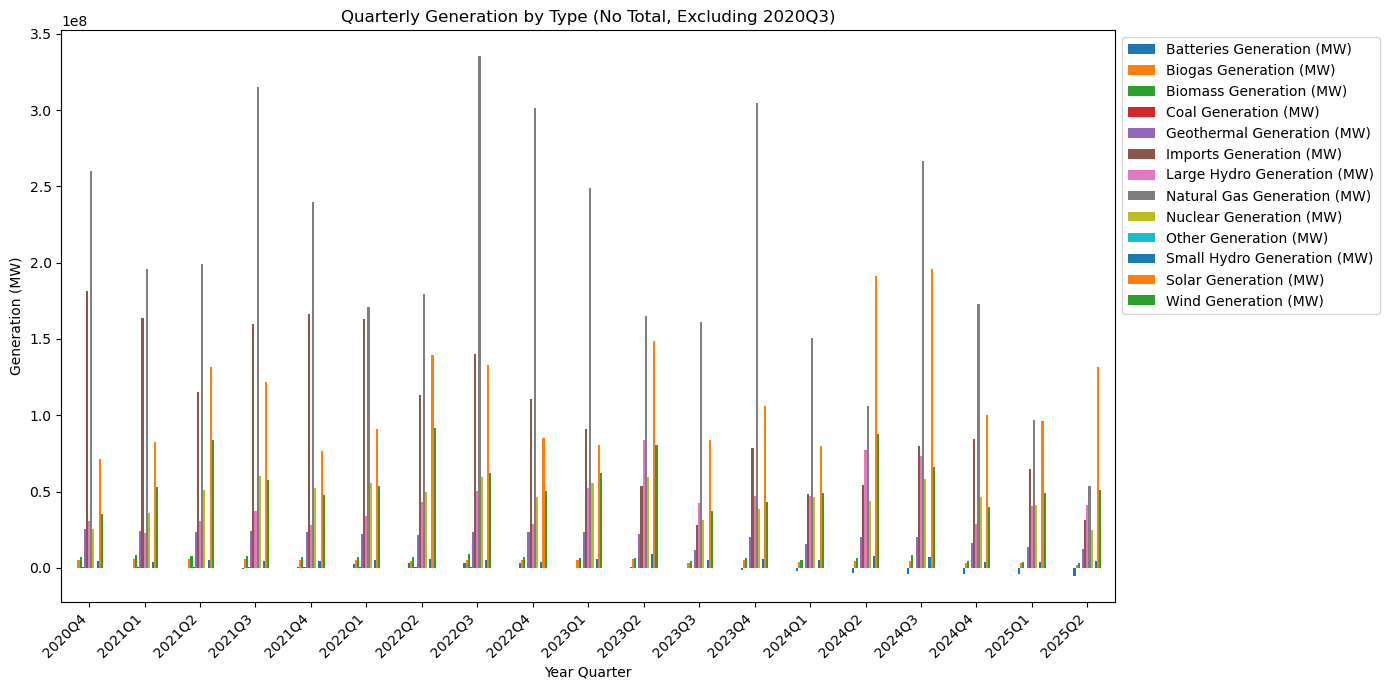

In [7]:
# Safely drop 2020Q3 if present
if '2020Q3' in quarterly_generation_totals.index:
    filtered_quarterly_gen = quarterly_generation_totals.drop(index='2020Q3')
else:
    filtered_quarterly_gen = quarterly_generation_totals.copy()

fig, ax = plt.subplots(figsize=(14,7))
filtered_quarterly_gen.plot(kind='bar', ax=ax, stacked=False)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Year Quarter')
plt.ylabel('Generation (MW)')
plt.title('Quarterly Generation by Type (Excluding 2020Q3)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(14, 5))
filtered_quarterly_gen['Total Generation (MW)'].plot(kind='bar', ax=ax, color='steelblue')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Year Quarter')
plt.ylabel('Total Generation (MW)')
plt.title('Total Generation per Quarter')
plt.tight_layout()
plt.show()

gen_wo_total = filtered_quarterly_gen.drop(columns=['Total Generation (MW)'])

fig, ax = plt.subplots(figsize=(14,7))
gen_wo_total.plot(kind='bar', ax=ax, stacked=False)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Year Quarter')
plt.ylabel('Generation (MW)')
plt.title('Quarterly Generation by Type (No Total, Excluding 2020Q3)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [8]:
import pandas as pd

co2_file = r"C:\Users\Aisha\UWBclas\UWB25Spr\cs290RenEner\CaliSupplyVsEmissions\CAISO-historical-co2-20250530.csv"

# Read the file, keep the first row as header (default),
# but specify sep='\t' and engine='python' (as you did before)
# co2_df = pd.read_csv(co2_file, sep='\t', engine='python')

# Try reading with default comma separator
co2_df = pd.read_csv(co2_file, engine='python')  # no sep needed

print(co2_df.columns.tolist())
print(co2_df.head())


[' 05/30/2025 ', 'Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'Jun.', 'Jul.', 'Aug.', 'Sep.', 'Oct.', 'Nov.', 'Dec.']
    05/30/2025          Jan.         Feb.         Mar.         Apr.  \
0          2014  5615497.820  5022762.297  5289480.524  4812433.460   
1          2015  5505917.487  4527679.374  5087623.957  4685880.093   
2          2016  5309957.440  4382418.450  3873036.468  3656890.540   
3          2017  4586131.330  3731887.330  3291517.370  2987841.350   
4          2018  4571610.200  4074815.780  4156882.330  2925520.300   

           May         Jun.         Jul.         Aug.         Sep.  \
0  5331965.630  5451151.875  6904019.904  6760966.430  6619994.447   
1  4581901.769  5675018.244  6286634.530  6628457.346  6600688.580   
2  4173713.178  5008429.870  5777168.729  6122590.016  5384004.614   
3  3565602.350  4336090.740  5380078.860  5771255.430  5072859.610   
4  3076643.000  3745210.400  6181561.900  5990650.200  4860121.280   

          Oct.         Nov.         Dec.

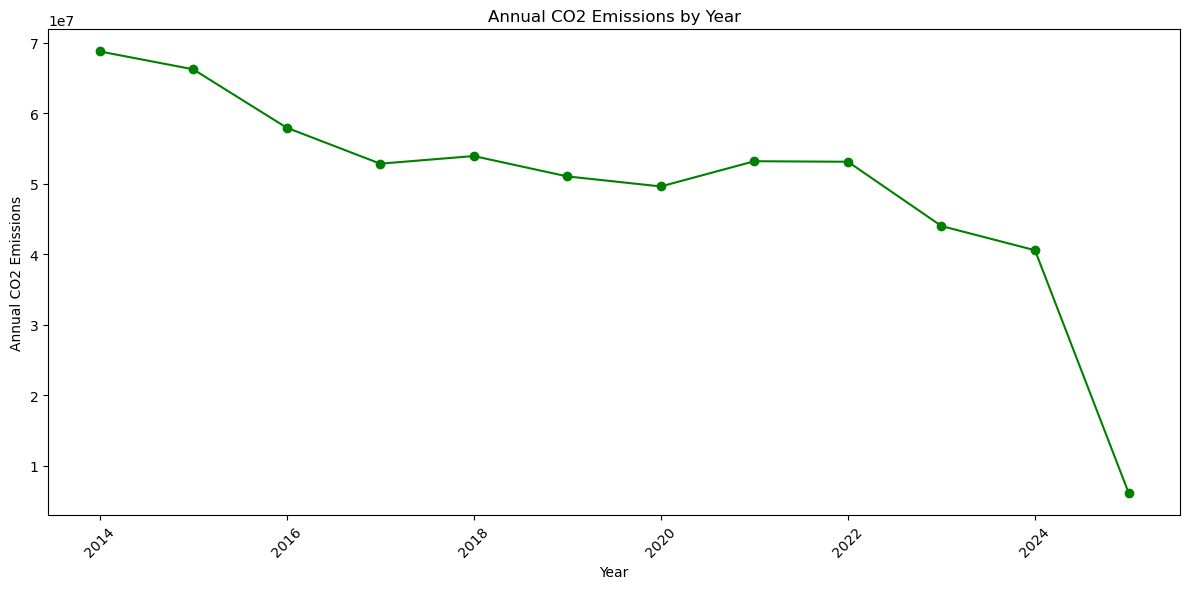

In [9]:
year_col = ' 05/30/2025 '
co2_df['Annual_CO2'] = co2_df.iloc[:, 1:].sum(axis=1)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(co2_df[year_col], co2_df['Annual_CO2'], marker='o', linestyle='-', color='green')
plt.xlabel('Year')
plt.ylabel('Annual CO2 Emissions')
plt.title('Annual CO2 Emissions by Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


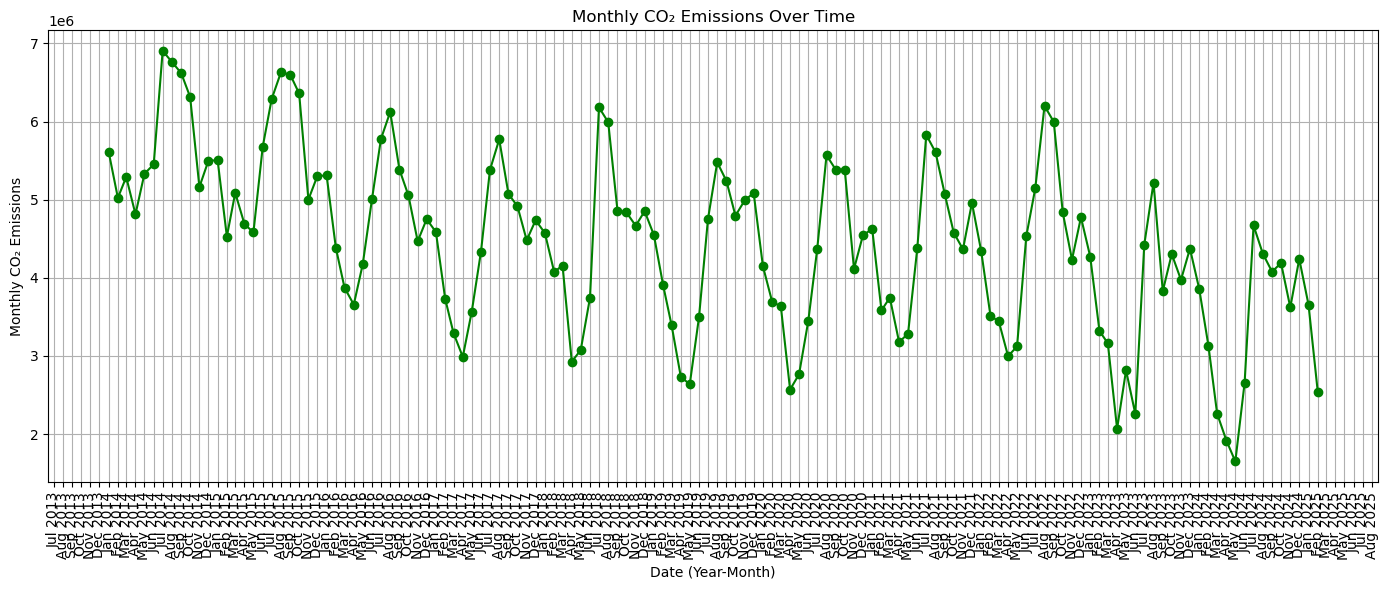

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assume co2_df is already loaded and looks like your data
# Example: co2_df.columns = [' 05/30/2025 ', 'Jan.', 'Feb.', ..., 'Dec.']

year_col = co2_df.columns[0]  # e.g. ' 05/30/2025 '
month_cols = co2_df.columns[1:]  # All month columns

# Step 1: Melt the wide DataFrame to long format (Year, Month, CO2_Emissions)
monthly_df = co2_df.melt(id_vars=[year_col], value_vars=month_cols,
                         var_name='Month', value_name='CO2_Emissions')

# Step 2: Rename columns for clarity
monthly_df.rename(columns={year_col: 'Year'}, inplace=True)
monthly_df['Month'] = monthly_df['Month'].str.strip().str.replace('.', '', regex=False)

# Step 3: Convert CO₂ emissions to numeric type
monthly_df['CO2_Emissions'] = pd.to_numeric(monthly_df['CO2_Emissions'], errors='coerce')

# Step 4: Map month names to month numbers
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_to_num = {name: f"{i+1:02}" for i, name in enumerate(month_order)}
monthly_df['Month_Num'] = monthly_df['Month'].map(month_to_num)

# Step 5: Create a datetime column for plotting
monthly_df['Date'] = pd.to_datetime(monthly_df['Year'].astype(str) + '-' + monthly_df['Month_Num'])

# Step 6: Sort by date
monthly_df = monthly_df.sort_values('Date')

# Step 7: Plot monthly CO2 emissions over time
plt.figure(figsize=(14, 6))
plt.plot(monthly_df['Date'], monthly_df['CO2_Emissions'], color='green', marker='o')
plt.xlabel('Date (Year-Month)')
plt.ylabel('Monthly CO₂ Emissions')
plt.title('Monthly CO₂ Emissions Over Time')
plt.grid(True)

# Step 8: Format x-axis to show every month-year label
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format: Jan 2025
plt.xticks(rotation=90)  # Rotate labels vertically for clarity

plt.tight_layout()
plt.show()


In [11]:
# Step 1: Define quarter mapping
quarter_map = {
    'Jan': 'Q1', 'Feb': 'Q1', 'Mar': 'Q1',
    'Apr': 'Q2', 'May': 'Q2', 'Jun': 'Q2',
    'Jul': 'Q3', 'Aug': 'Q3', 'Sep': 'Q3',
    'Oct': 'Q4', 'Nov': 'Q4', 'Dec': 'Q4'
}

# Step 2: Map Month to Quarter
monthly_df['Quarter'] = monthly_df['Month'].map(quarter_map)

# Step 3: Create 'QuarterYear' string, e.g. "2025-Q1"
monthly_df['QuarterYear'] = monthly_df['Year'].astype(str) + '-' + monthly_df['Quarter']

# Check the result
print(monthly_df[['Year', 'Month', 'Quarter', 'QuarterYear']].head())


    Year Month Quarter QuarterYear
0   2014   Jan      Q1     2014-Q1
12  2014   Feb      Q1     2014-Q1
24  2014   Mar      Q1     2014-Q1
36  2014   Apr      Q2     2014-Q2
48  2014   May      Q2     2014-Q2


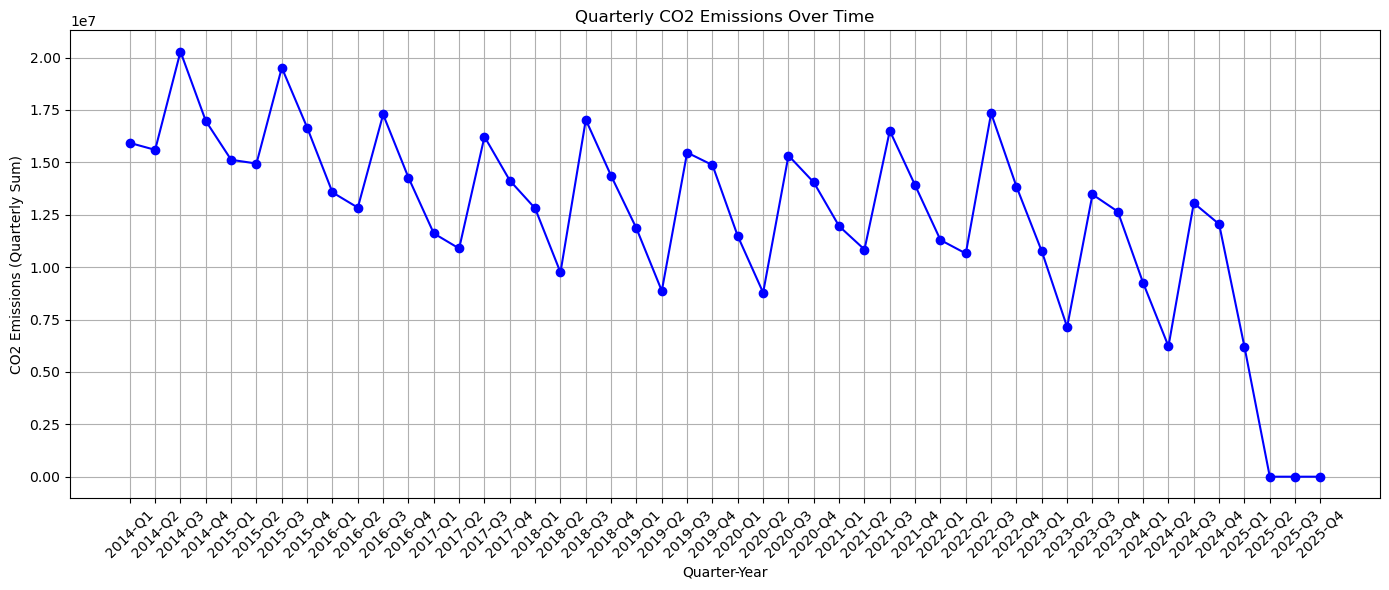

In [12]:
import matplotlib.pyplot as plt

# Aggregate CO2 emissions by QuarterYear (sum)
quarterly_df = monthly_df.groupby('QuarterYear')['CO2_Emissions'].sum().reset_index()

# Optional: sort by QuarterYear for proper x-axis order
quarterly_df = quarterly_df.sort_values('QuarterYear')

# Plot
plt.figure(figsize=(14, 6))
plt.plot(quarterly_df['QuarterYear'], quarterly_df['CO2_Emissions'], marker='o', linestyle='-', color='blue')
plt.xlabel('Quarter-Year')
plt.ylabel('CO2 Emissions (Quarterly Sum)')
plt.title('Quarterly CO2 Emissions Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


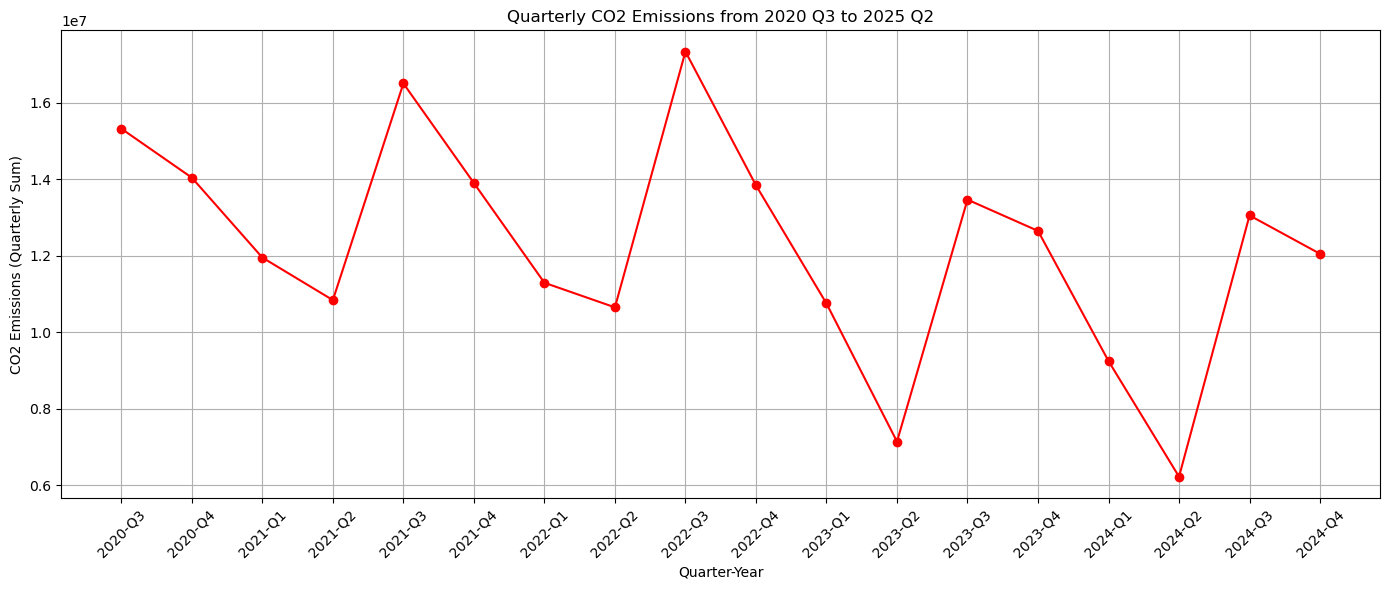

In [13]:
# Define the start and end quarter-year strings
start_q = '2020-Q3'
end_q = '2024-Q4'

# Filter quarterly_df to only include quarters within the range (inclusive)
filtered_quarters = quarterly_df[
    (quarterly_df['QuarterYear'] >= start_q) & (quarterly_df['QuarterYear'] <= end_q)
]

# Plot filtered data
plt.figure(figsize=(14, 6))
plt.plot(filtered_quarters['QuarterYear'], filtered_quarters['CO2_Emissions'],
         marker='o', linestyle='-', color='red')
plt.xlabel('Quarter-Year')
plt.ylabel('CO2 Emissions (Quarterly Sum)')
plt.title('Quarterly CO2 Emissions from 2020 Q3 to 2025 Q2')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


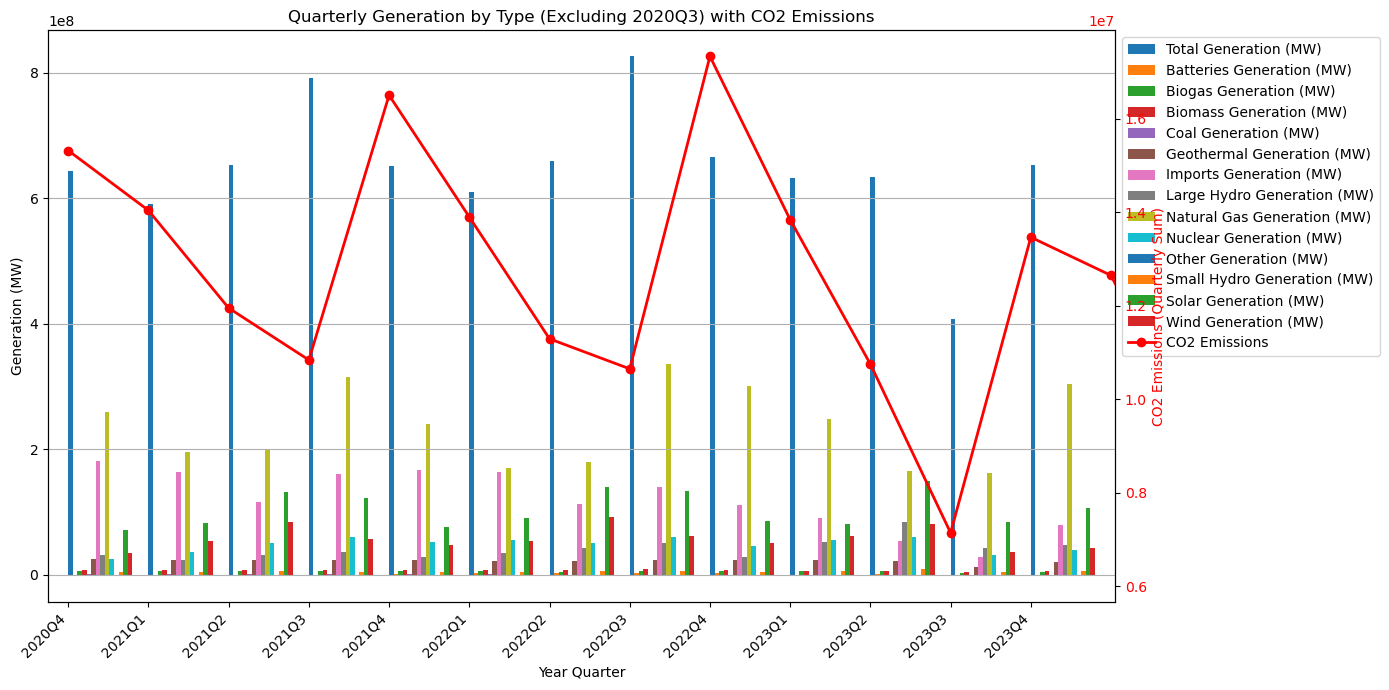

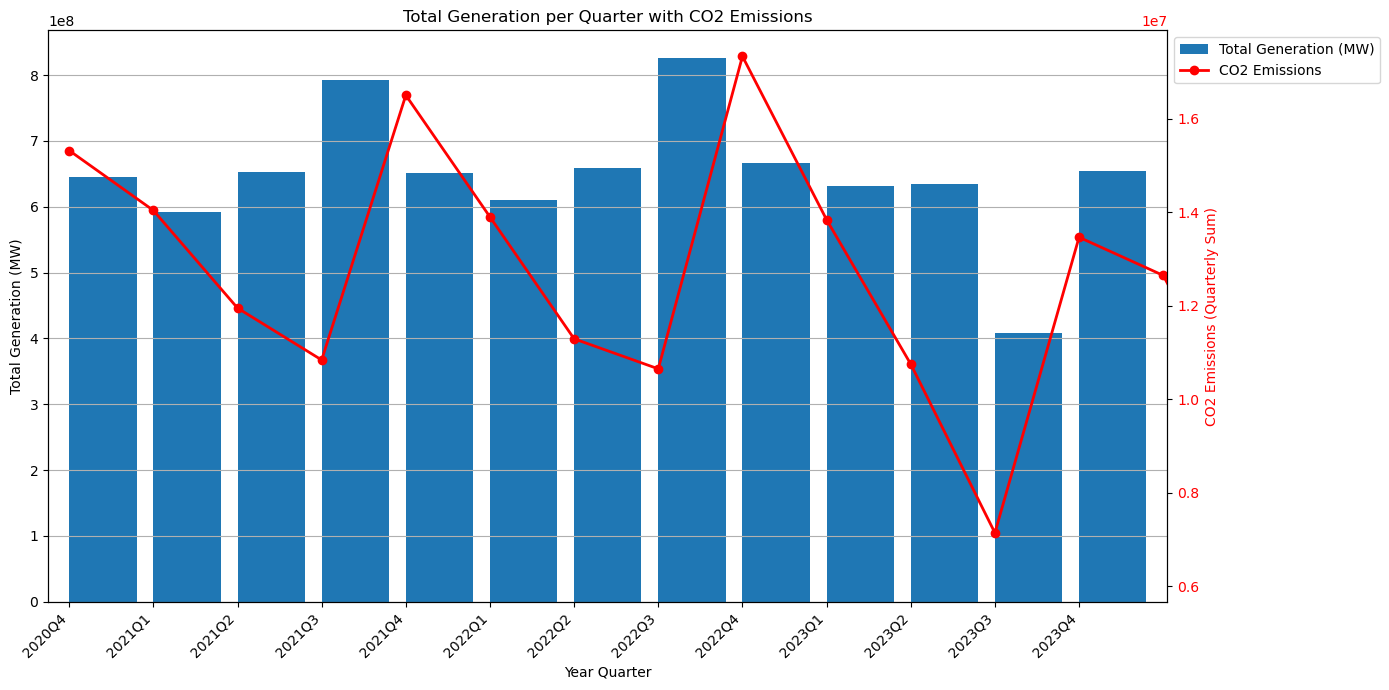

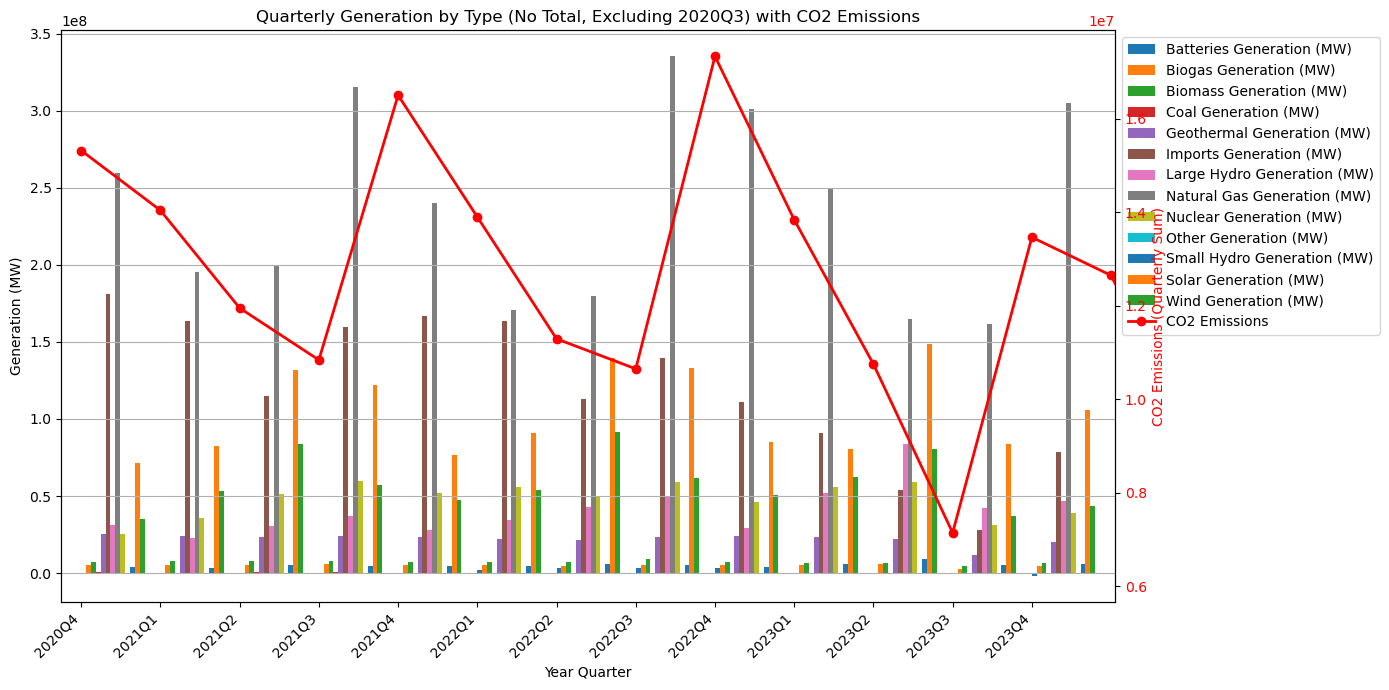

In [14]:
import matplotlib.pyplot as plt

# Quarter range and data filtering as before
start_q = '2020-Q3'
end_q = '2024-Q4'

# Drop 2020Q3 safely
if '2020Q3' in quarterly_generation_totals.index:
    filtered_quarterly_gen = quarterly_generation_totals.drop(index='2020Q3')
else:
    filtered_quarterly_gen = quarterly_generation_totals.copy()

filtered_quarterly_gen = filtered_quarterly_gen.loc[
    (filtered_quarterly_gen.index >= start_q) & (filtered_quarterly_gen.index <= end_q)
]

filtered_quarters = quarterly_df[
    (quarterly_df['QuarterYear'] >= start_q) & (quarterly_df['QuarterYear'] <= end_q)
]

# Function to plot bars + CO2 line with twin y-axes on same chart
def plot_bars_with_co2_line(bar_data, bar_title, bar_ylabel):
    fig, ax1 = plt.subplots(figsize=(14, 7))

    # Bar chart on primary y-axis
    bar_data.plot(kind='bar', ax=ax1, stacked=False, width=0.8, position=0)
    ax1.set_ylabel(bar_ylabel)
    ax1.set_xlabel('Year Quarter')
    ax1.set_title(bar_title)
    ax1.grid(axis='y')

    # Secondary y-axis for CO2 emissions line
    ax2 = ax1.twinx()
    ax2.plot(filtered_quarters['QuarterYear'], filtered_quarters['CO2_Emissions'],
             color='red', marker='o', linestyle='-', linewidth=2, label='CO2 Emissions')
    ax2.set_ylabel('CO2 Emissions (Quarterly Sum)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Align x-axis ticks & labels, rotate for clarity
    ax1.set_xticklabels(bar_data.index, rotation=45, ha='right')

    # Combine legends (bars + line)
    handles1, labels1 = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper left', bbox_to_anchor=(1,1))

    plt.tight_layout()
    plt.show()

# 1) All generation + total
plot_bars_with_co2_line(
    filtered_quarterly_gen,
    'Quarterly Generation by Type (Excluding 2020Q3) with CO2 Emissions',
    'Generation (MW)'
)

# 2) Total generation only
plot_bars_with_co2_line(
    filtered_quarterly_gen[['Total Generation (MW)']],
    'Total Generation per Quarter with CO2 Emissions',
    'Total Generation (MW)'
)

# 3) Generation types without total
gen_wo_total = filtered_quarterly_gen.drop(columns=['Total Generation (MW)'])
plot_bars_with_co2_line(
    gen_wo_total,
    'Quarterly Generation by Type (No Total, Excluding 2020Q3) with CO2 Emissions',
    'Generation (MW)'
)


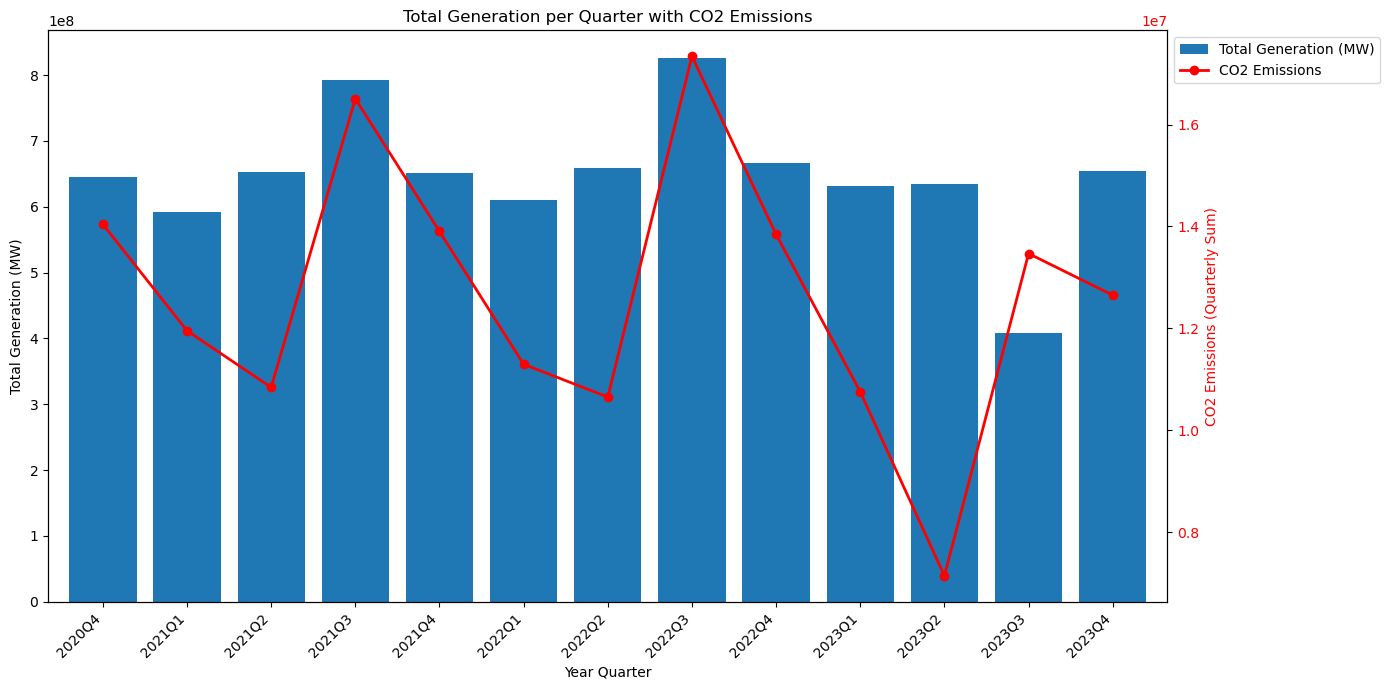

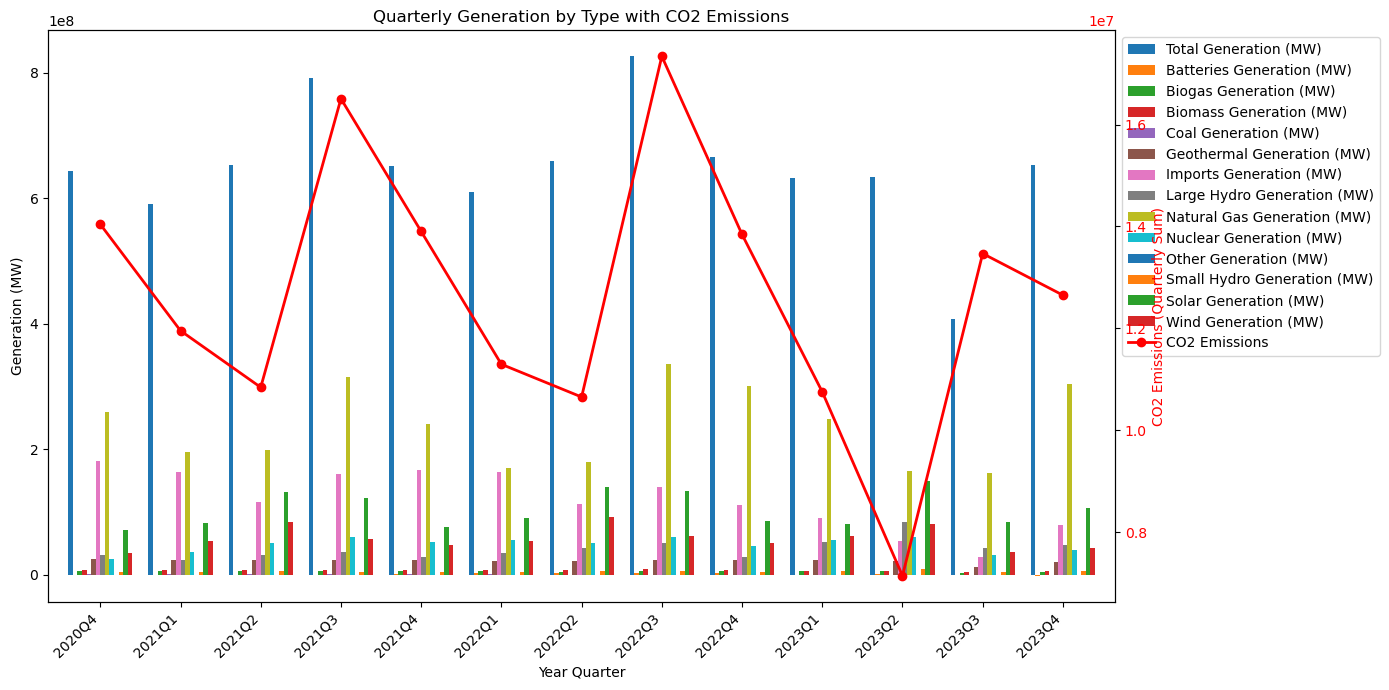

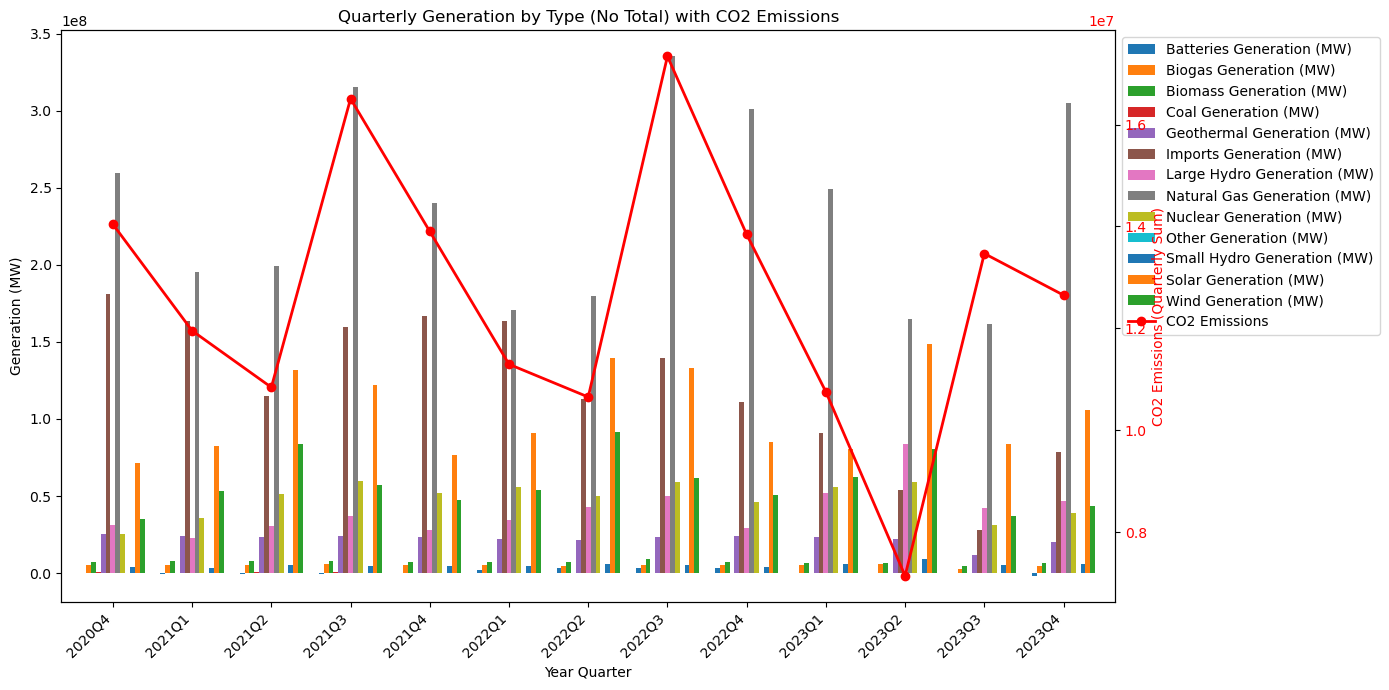

In [15]:
import matplotlib.pyplot as plt
import numpy as np

def plot_bars_with_co2_line(bar_data, title, y_label):
    fig, ax1 = plt.subplots(figsize=(14,7))

    # Bar plot (generation)
    bar_data.plot(kind='bar', ax=ax1, stacked=False, width=0.8)

    ax1.set_xlabel('Year Quarter')
    ax1.set_ylabel(y_label)
    ax1.set_title(title)
    ax1.tick_params(axis='x', rotation=45)
    ax1.legend(loc='upper left', bbox_to_anchor=(1,1))

    # Secondary y-axis for CO2 line
    ax2 = ax1.twinx()

    # Calculate bar centers to align CO2 points
    bar_centers = np.arange(len(bar_data.index))
    
    # Plot CO2 emissions line
    ax2.plot(bar_centers, filtered_quarters['CO2_Emissions'].values,
             color='red', marker='o', linestyle='-', linewidth=2, label='CO2 Emissions')

    ax2.set_ylabel('CO2 Emissions (Quarterly Sum)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.grid(False)

    # Set x-ticks to bar centers and labels
    ax1.set_xticks(bar_centers)
    ax1.set_xticklabels(bar_data.index, rotation=45, ha='right')

    # Combine legends
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc='upper left', bbox_to_anchor=(1,1))

    plt.tight_layout()
    plt.show()

# --- Data preparation ---

# Define quarter range as strings without dash to match index formatting
start_q = '2020Q3'
end_q = '2024Q4'

# Filter generation data by index (assumed index like '2020Q3')
filtered_quarterly_gen = filtered_quarterly_gen.loc[
    (filtered_quarterly_gen.index >= start_q) & (filtered_quarterly_gen.index <= end_q)
]

# Filter CO2 data by QuarterYear, remove dashes to match index style
filtered_quarters = filtered_quarters[
    (filtered_quarters['QuarterYear'].str.replace('-', '') >= start_q) &
    (filtered_quarters['QuarterYear'].str.replace('-', '') <= end_q)
]

# Sort both by quarter ascending
filtered_quarterly_gen = filtered_quarterly_gen.sort_index()
filtered_quarters = filtered_quarters.sort_values('QuarterYear')

# Align CO2 data to only quarters in generation index (just in case)
filtered_quarters = filtered_quarters[
    filtered_quarters['QuarterYear'].str.replace('-', '').isin(filtered_quarterly_gen.index)
]

# --- Plot examples ---

# 1) Total Generation only with CO2 line
plot_bars_with_co2_line(
    filtered_quarterly_gen[['Total Generation (MW)']],
    'Total Generation per Quarter with CO2 Emissions',
    'Total Generation (MW)'
)

# 2) All generation types (including Total) with CO2 line
plot_bars_with_co2_line(
    filtered_quarterly_gen,
    'Quarterly Generation by Type with CO2 Emissions',
    'Generation (MW)'
)

# 3) All generation types excluding total (if you want)
gen_wo_total = filtered_quarterly_gen.drop(columns=['Total Generation (MW)'])
plot_bars_with_co2_line(
    gen_wo_total,
    'Quarterly Generation by Type (No Total) with CO2 Emissions',
    'Generation (MW)'
)


In [16]:
import pandas as pd
import csv

# Detect delimiter
with open("caiso_gen_all_5min_2020Q3.csv", "r") as f:
    sample_line = f.readline()
    dialect = csv.Sniffer().sniff(sample_line)

print(f"Detected delimiter: {repr(dialect.delimiter)}")
#print(gen_types)



Detected delimiter: ' '


C:\Users\Aisha\AppData\Local\Temp\ipykernel_31584\3405821909.py:25: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  generation_df['Quarter'] = generation_df['timestamp'].dt.to_period("Q")
C:\Users\Aisha\AppData\Local\Temp\ipykernel_31584\3405821909.py:26: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  generation_df['monthYear'] = generation_df['timestamp'].dt.to_period("M")


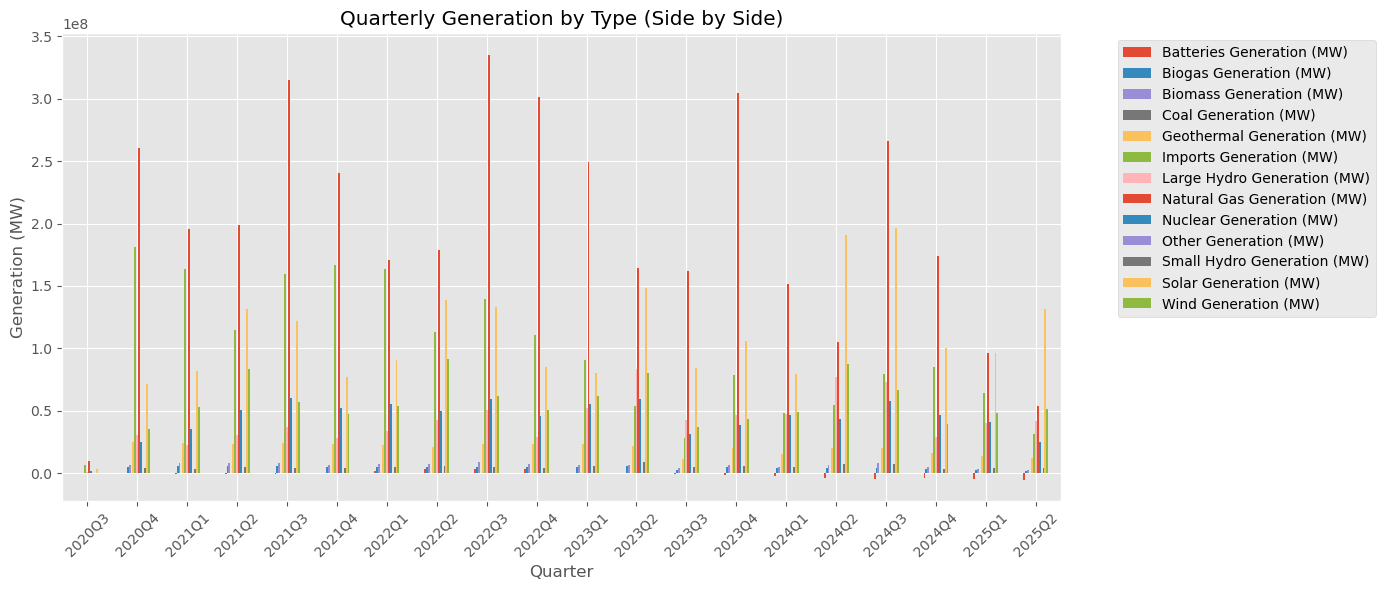

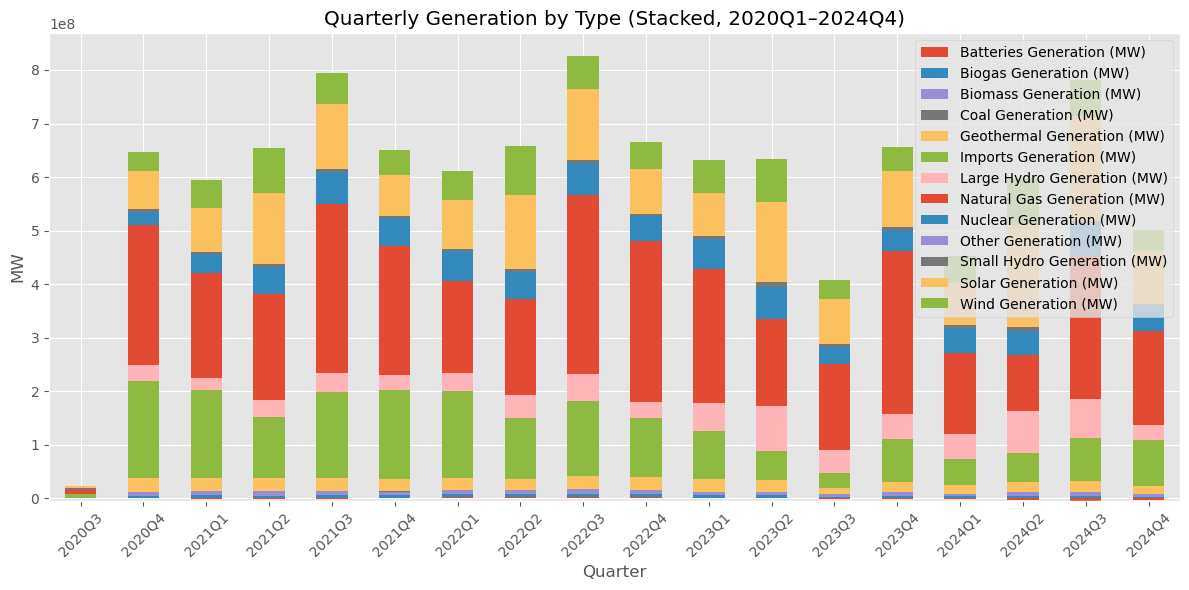

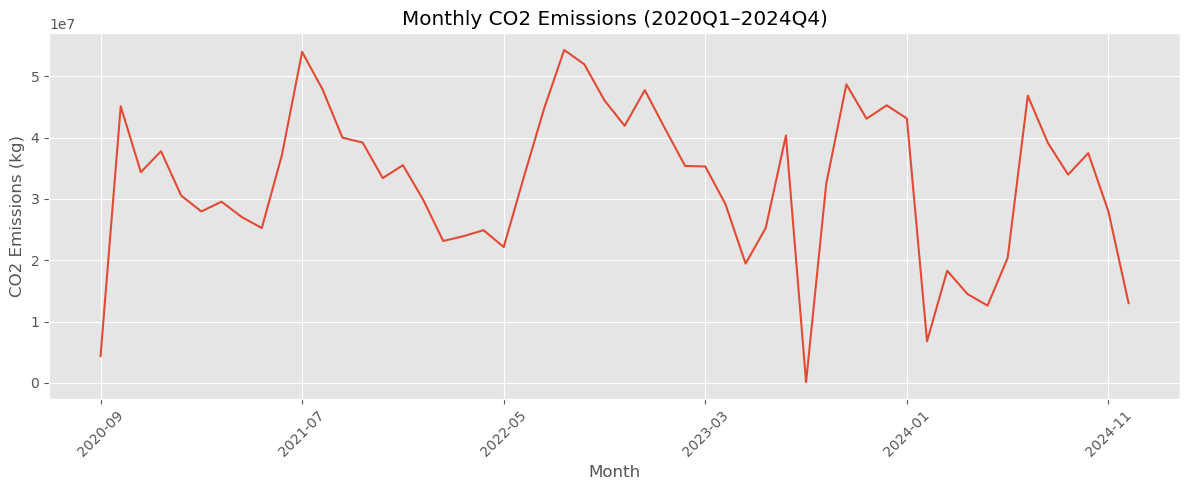

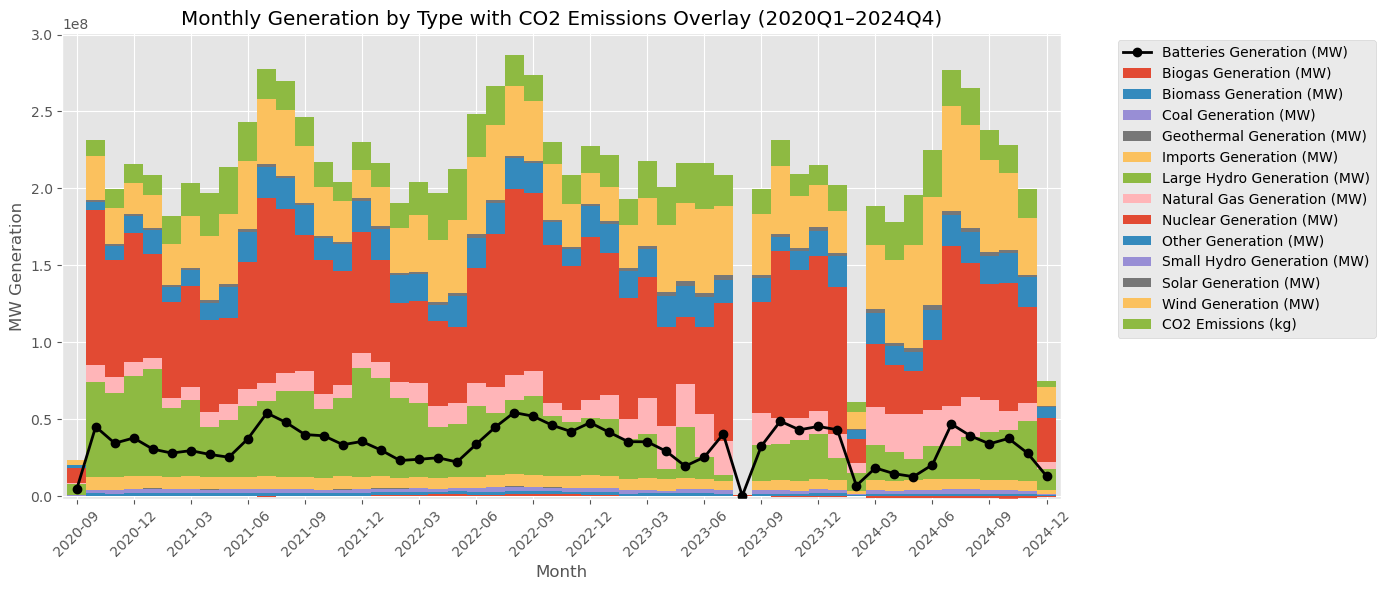

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

plt.style.use('ggplot')

# Load and combine generation data
gen_files = glob.glob("caiso_gen_all_5min_*.csv")
dfs = []
for file in gen_files:
    df = pd.read_csv(file, skiprows=3, header=0, low_memory=False)
    dfs.append(df)
generation_df = pd.concat(dfs, ignore_index=True)

# Parse datetime
if 'UTC Timestamp (Interval Ending)' in generation_df.columns:
    generation_df.rename(columns={'UTC Timestamp (Interval Ending)': 'Datetime'}, inplace=True)
    generation_df['timestamp'] = pd.to_datetime(generation_df['Datetime'], utc=True)
else:
    raise ValueError("Timestamp column not found. Check your columns.")

generation_df['Year'] = generation_df['timestamp'].dt.year
generation_df['Month'] = generation_df['timestamp'].dt.month
generation_df['Quarter'] = generation_df['timestamp'].dt.to_period("Q")
generation_df['monthYear'] = generation_df['timestamp'].dt.to_period("M")

# Grouping for quarterly generation
quarterly = generation_df.groupby('Quarter').sum(numeric_only=True)

# Grouping for monthly CO2 emissions
if 'CO2 Emissions (kg)' in generation_df.columns:
    monthly_co2 = generation_df.groupby('monthYear')['CO2 Emissions (kg)'].sum()
else:
    generation_df['CO2 Emissions (kg)'] = generation_df['Natural Gas Generation (MW)'] * 0.45
    monthly_co2 = generation_df.groupby('monthYear')['CO2 Emissions (kg)'].sum()

# Filter columns excluding total generation
exclude = ['Total Generation (MW)']
gen_cols = [col for col in quarterly.columns if "Generation (MW)" in col and col not in exclude]

# ------------------------------
# 1. Bar graph for each generation type quarterly (side by side)
# ------------------------------
quarterly_plot = quarterly[gen_cols].copy()
quarterly_plot.index = quarterly_plot.index.astype(str)
quarterly_plot.plot(kind='bar', figsize=(14, 6))
plt.title('Quarterly Generation by Type (Side by Side)')
plt.xlabel('Quarter')
plt.ylabel('Generation (MW)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ------------------------------
# 2. Stacked bar graph for generation types quarterly (2020Q1–2024Q4)
# ------------------------------
stacked = quarterly.loc["2020Q1":"2024Q4", gen_cols]
stacked.index = stacked.index.astype(str)
stacked.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Quarterly Generation by Type (Stacked, 2020Q1–2024Q4)")
plt.xlabel("Quarter")
plt.ylabel("MW")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ------------------------------
# 3. Line graph for monthly CO2 emissions (2020Q1–2024Q4)
# ------------------------------
monthly_co2_filtered = monthly_co2.loc["2020-01":"2024-12"]
monthly_co2_filtered.index = monthly_co2_filtered.index.astype(str)
plt.figure(figsize=(12, 5))
monthly_co2_filtered.plot()
plt.title("Monthly CO2 Emissions (2020Q1–2024Q4)")
plt.xlabel("Month")
plt.ylabel("CO2 Emissions (kg)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ------------------------------
# 4. Stacked bar (monthly gen types) + CO2 line overlay (2020Q1–2024Q4)
# ------------------------------
monthly_gen = generation_df.groupby('monthYear')[gen_cols].sum()
monthly_gen = monthly_gen.loc["2020-01":"2024-12"]
monthly_gen.index = monthly_gen.index.astype(str)

fig, ax1 = plt.subplots(figsize=(14, 6))
monthly_gen.plot(kind='bar', stacked=True, ax=ax1, width=1, legend=False)
ax1.set_ylabel("MW Generation")
ax1.set_xlabel("Month")
ax1.set_title("Monthly Generation by Type with CO2 Emissions Overlay (2020Q1–2024Q4)")
ax1.set_xticks(range(0, len(monthly_gen.index), 3))
ax1.set_xticklabels(monthly_gen.index[::3], rotation=45)

# Overlay CO2 emissions on same axis (not twin)
ax1.plot(range(len(monthly_co2_filtered)), monthly_co2_filtered.values, color='black', lw=2, marker='o', label='CO2 Emissions (kg)')
ax1.legend(list(monthly_gen.columns) + ['CO2 Emissions (kg)'], bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [18]:
quarterly_files = glob.glob(os.path.join(folder_path, "caiso_gen_all_5min_*.csv"))
all_quarterly_data = []
for file in quarterly_files:
    df = pd.read_csv(file, skiprows=3)
    # ...existing code...
    all_quarterly_data.append(df)
combined_df = pd.concat(all_quarterly_data, ignore_index=True)

In [19]:
pastel_colors = [
    '#a6cee3', '#1f78b4', '#b2df8a', '#33a02c',
    '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00',
    '#cab2d6', '#6a3d9a', '#ffff99', '#b15928'
]